In [1]:
import numpy as np
import astropy
from astropy.io import fits
import matplotlib.pyplot as plt
import copy
from pprint import pprint
import pylab
import sys
import os
%matplotlib inline

//anaconda/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [2]:
data = fits.open('QTOTAL.fits')
cols = data[1].columns
quasars = data[1].data 

RA = quasars['ra']
DEC = quasars['dec']
ID = quasars['object_id']
Z = quasars['user.z']

In [60]:
#index = [2050, 1055, 9232, 543, 415, 895, 901, 2564, 2499, 2333]  # given index -1 from TOPCAT
# sample of quasars redshift < 1. first 10 when sorted by Z in topcat



#'Q_178.168914766_-0.501176508188_IBAND'


#for i in index:
#    print "Q_" + str(RA[i]) + "_" + str(DEC[i]) + '_IBAND'

total = 0
# first 1000 stops at i = 3964
# second 1000 stops at i=8855
# and then there are 99 more
# when doing range do +1 to avoid double counting

for i in range(3964, len(Z)):
    if Z[i] <=1 and total <1000:
        total += 1
        print str(RA[i]) +", " + str(DEC[i]) + "    z = " + str(Z[i])
    if total == 1000:
        print i
        break
print total, i

#### Write to txt file the quarry images
### but can only quarry 1,000 at a time

f = open("quarryZ1_2.txt","w") # quarry z < 1 part 1
# then the images are returned in column order, so name based off of this file
# be sure to double check some images afterwards
 

filt = "HSC-I"
size = "4asec"
f.write("#? \t filter \t ra \t dec \t sw \t sh \n") 

r = []
d = []


total = 0
i = 0


for i in range(3964, len(Z)):
    if Z[i] < 1 and total < 1000:
        total += 1
        f.write("\t {0} \t {1} \t {2} \t {3} \t {3} \n".format(filt, RA[i], DEC[i], size) )
        r.append(RA[i])
        d.append(DEC[i])
    if total == 1000:
        print i
        break
print total, i

#while total < 1000:
#    if Z[i] < 1:
#        r.append(RA[i])
#        d.append(DEC[i])
        
#        total += 1
        #f.write("{0} \t {1} \n".format(RA[i], DEC[i])) 
        #print Z[i]
#    i += 1
    #print i
    
#f.close() 

print len(r), len(d)
RADEC = zip(r,d)
print len(RADEC)


#print RADEC


137.859305754, 2.88914878588    z = 0.5666
137.890440731, 1.9024022002    z = 0.6495
137.984228077, -0.861203766898    z = 0.57036370039
137.989801006, 1.72435244726    z = 0.6028
138.019235329, 0.621944942383    z = 0.9612
138.114471671, -0.680974550904    z = 0.614422738552
138.126858417, 1.22997467258    z = 0.834677755833
138.137279802, 0.281441358284    z = 0.557
138.17974674, 1.33709161575    z = 0.5412
138.182047416, 2.45412183834    z = 0.836049556732
138.192217937, 1.18188846617    z = 0.670678436756
138.214844083, -0.865997529847    z = 0.609915554523
138.227201342, -0.608374721927    z = 0.7507
138.233224277, -0.669357845118    z = 0.8287
138.240492048, 0.937353940741    z = 0.795414984226
138.253417065, 1.92093600878    z = 0.9125
138.263416594, 3.01901464712    z = 0.602652847767
138.317459325, 2.32649325821    z = 0.743134737015
138.341011971, 2.19226304232    z = 0.9999
138.354888608, -0.16911269228    z = 0.998
138.359846316, -0.347714728718    z = 0.9214
138.363116203,

Filename: images/arch-170501-072801/Q_178.193992828_0.411129081814_IBAND.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      21   ()              
1    IMAGE       ImageHDU        34   (49, 48)     float32   
2                ImageHDU         5   ()              
3                ImageHDU         5   ()              


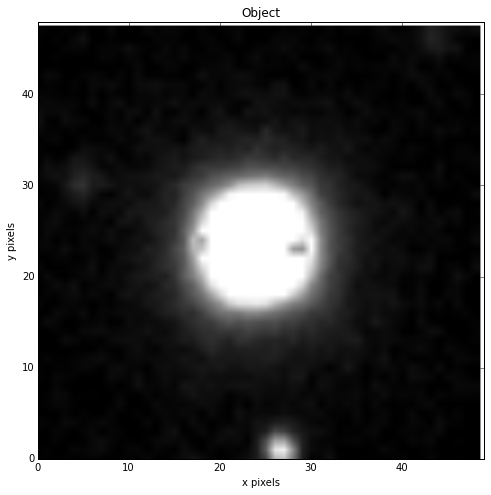

'\n# rename the files with Q_{ra}_{dec}_IBAND.PSF\npathQ = "/Users/katelynneese/Desktop/Senior Thesis/images/arch-170501-072801/"\ndirs = os.listdir( pathQ )\n\nprint RADEC\n\n\nfor file in dirs:\n    clean = str(file).split(\'-\')\n    ra, dec = RADEC[int(clean[0]) - 2]\n    #print clean[0], ra, dec\n    name = pathQ + str(file)\n    #print name\n    os.rename(name, "Q_{0}_{1}_IBAND.fits".format(ra, dec))\n    #print clean[0], file, ra, dec\n    \n    #PSFlist.append(file)\n    \n    '

In [71]:

hdulist1 = fits.open('images/arch-170501-072801/Q_178.193992828_0.411129081814_IBAND.fits')  # I band image
hdulist1.info()
Q = hdulist1[1].data
size = Q.shape




pylab.figure(figsize=(8,8))
pylab.gray()
pylab.imshow(Q, vmin = 0, vmax = 3)

pylab.xlabel('x pixels')
pylab.ylabel('y pixels')
pylab.title("Object")
pylab.ylim([0, size[0]])
pylab.xlim([0, size[1]])
plt.show()


"""
# rename the files with Q_{ra}_{dec}_IBAND.PSF
pathQ = "/Users/katelynneese/Desktop/Senior Thesis/images/arch-170501-072801/"
dirs = os.listdir( pathQ )

print RADEC


for file in dirs:
    clean = str(file).split('-')
    ra, dec = RADEC[int(clean[0]) - 2]
    #print clean[0], ra, dec
    name = pathQ + str(file)
    #print name
    os.rename(name, "Q_{0}_{1}_IBAND.fits".format(ra, dec))
    #print clean[0], file, ra, dec
    
    #PSFlist.append(file)
    
    """
